# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [86]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [87]:
data = pd.read_csv('/Users/sanketdhameliya/Downloads/Wholesale_Data.csv')

In [88]:
# exploring data
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


there are 440 rows and 8 columns in the dataset

In [90]:
# identifying missing values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

the data has no missing values

Descriptive Statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000  

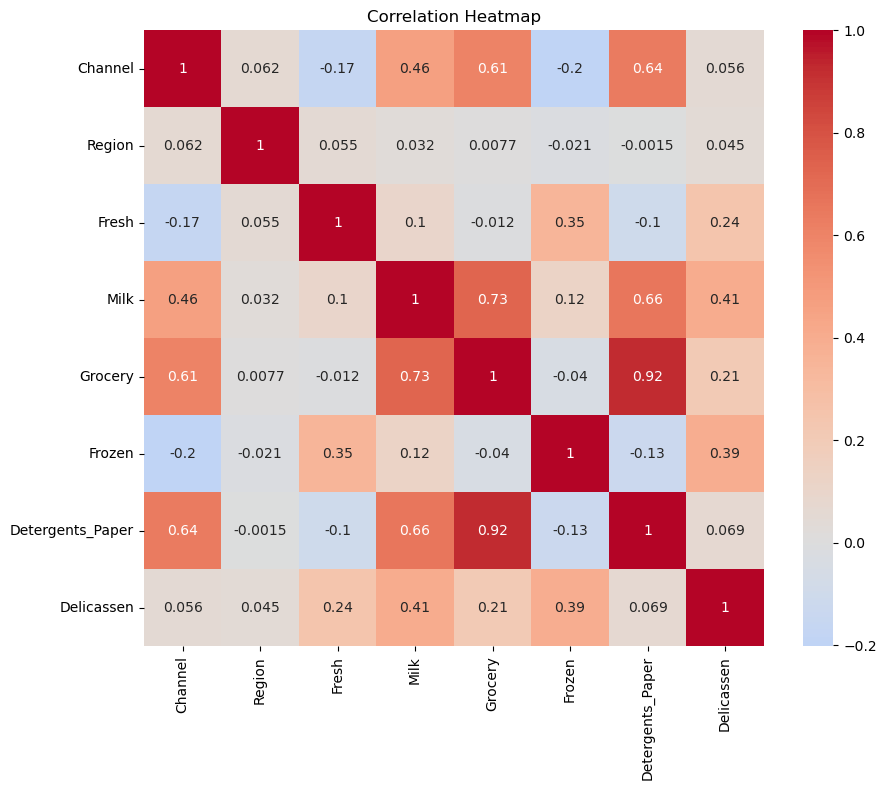

In [91]:
# Check descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

# Check for duplicates
print("Number of duplicate rows: ", data.duplicated().sum())


# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

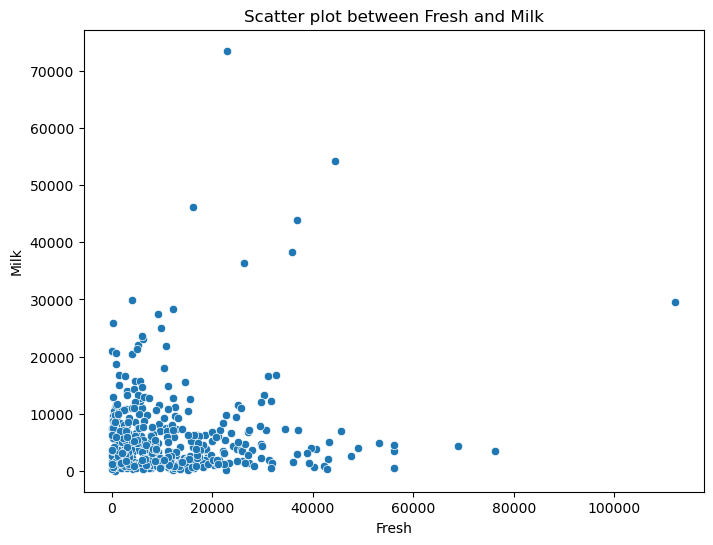

In [92]:
# identifying relationship between 'fresh' and 'milk'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Milk', data=data)
plt.title('Scatter plot between Fresh and Milk')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

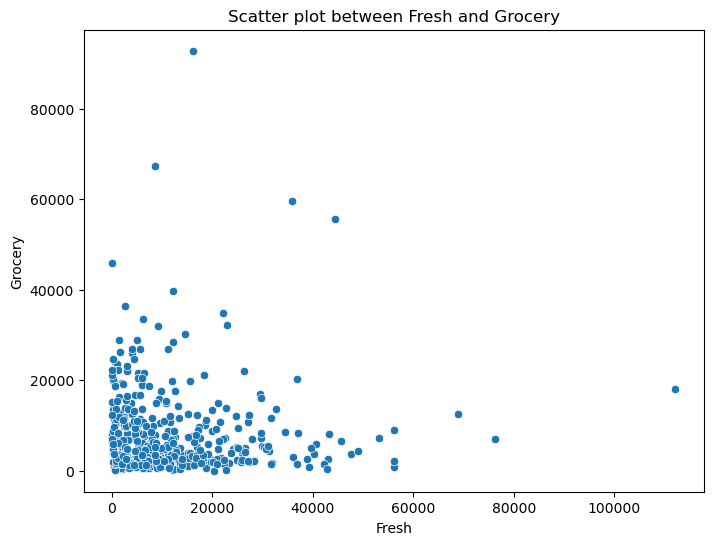

In [93]:
# identifying relationship between 'fresh' and 'Grocery'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fresh', y='Grocery', data=data)
plt.title('Scatter plot between Fresh and Grocery')
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

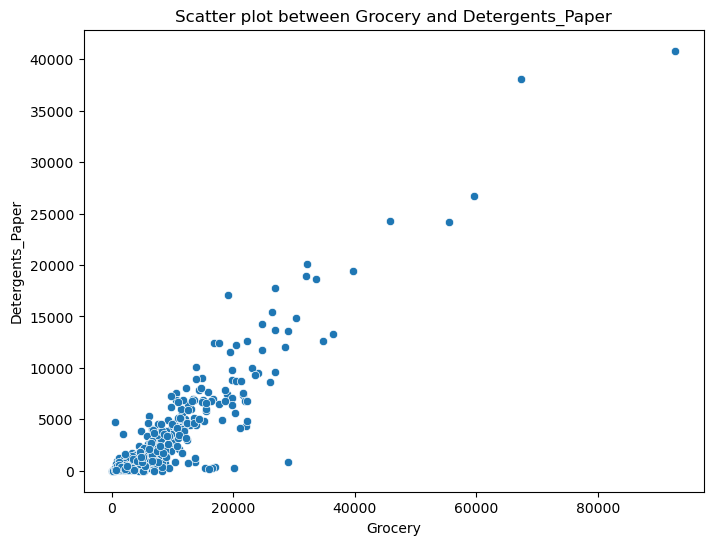

In [94]:
# Create a scatter plot between "Grocery" and "Detergents_Paper"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Grocery', y='Detergents_Paper', data=data)
plt.title('Scatter plot between Grocery and Detergents_Paper')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.show()

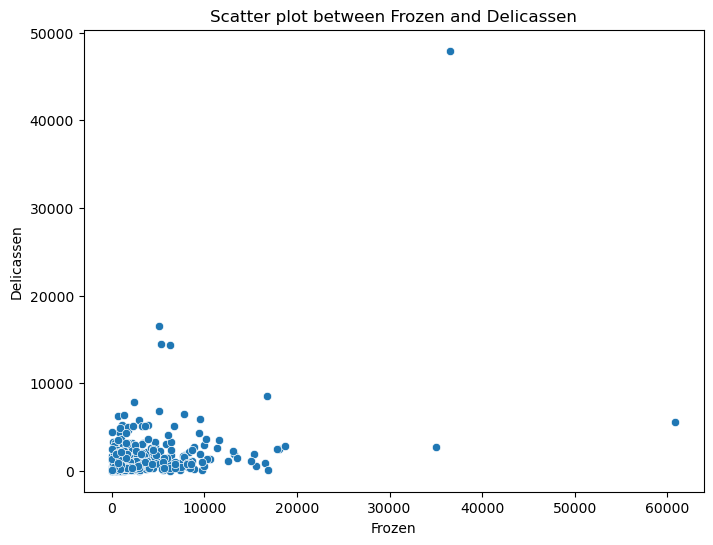

In [95]:
# Scatter plot between "Frozen" and "Delicassen"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Frozen', y='Delicassen', data=data)
plt.title('Scatter plot between Frozen and Delicassen')
plt.xlabel('Frozen')
plt.ylabel('Delicassen')
plt.show()

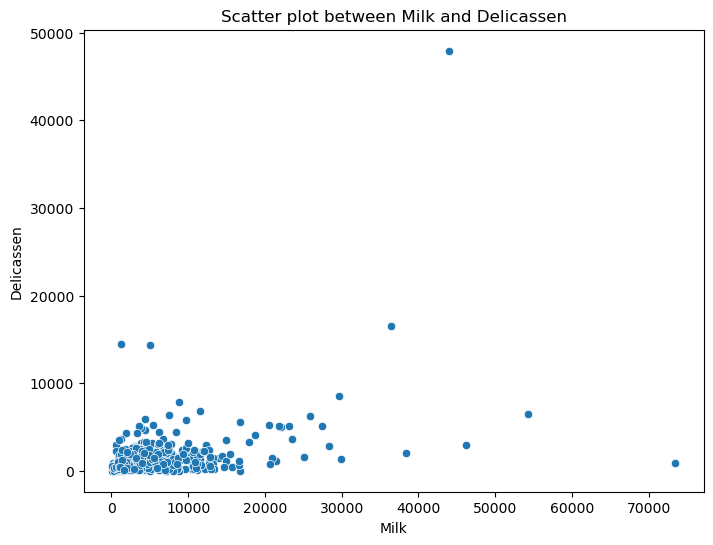

In [96]:
# Scatter plot between "Milk" and "Delicassen"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Milk', y='Delicassen', data=data)
plt.title('Scatter plot between Milk and Delicassen')
plt.xlabel('Milk')
plt.ylabel('Delicassen')
plt.show()

<Figure size 1200x800 with 0 Axes>

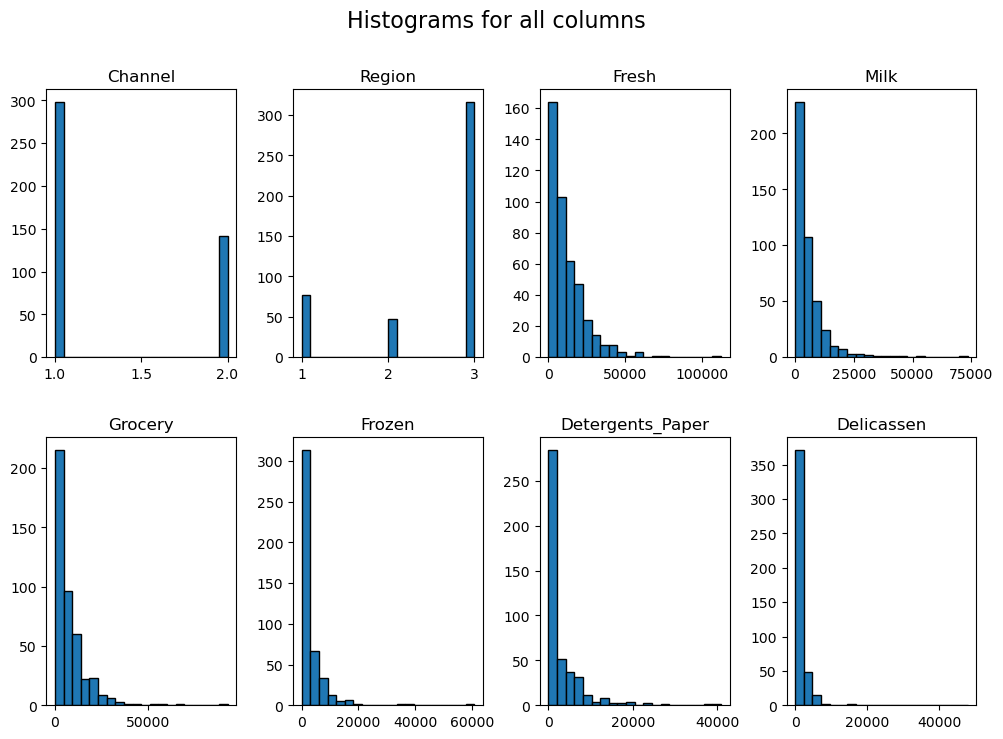

In [97]:
# Histograms for all columns
plt.figure(figsize=(12, 8))
data.hist(bins=20, edgecolor='black', grid=False, layout=(2, 4), figsize=(12, 8))
plt.suptitle('Histograms for all columns', fontsize=16)
plt.show()

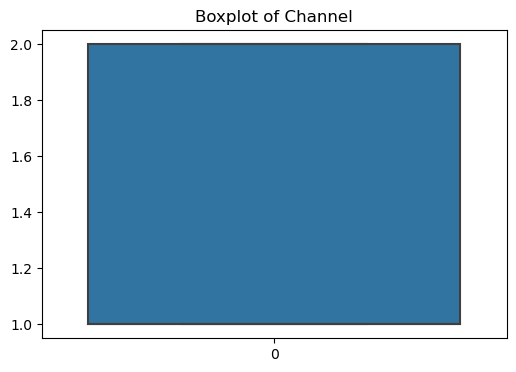

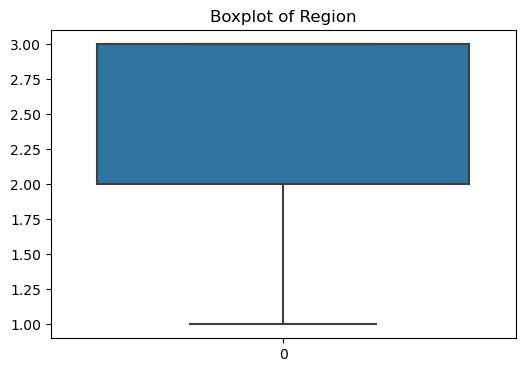

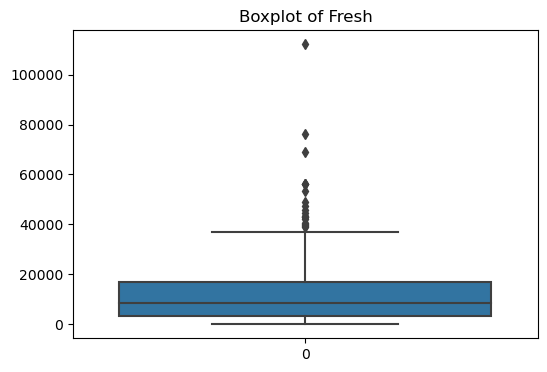

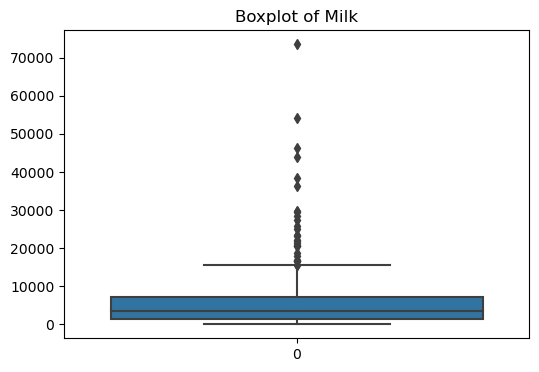

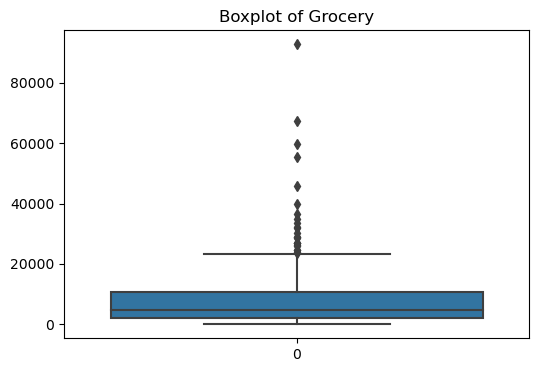

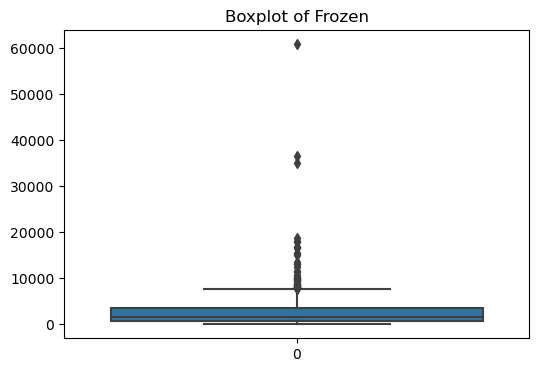

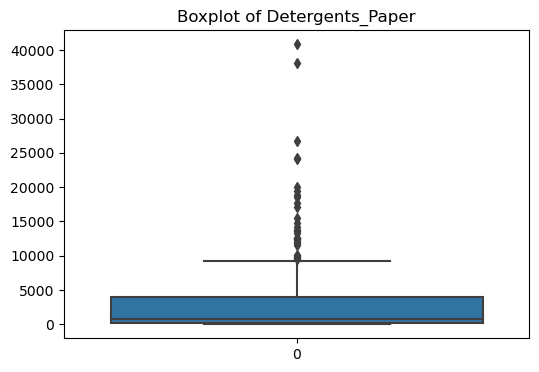

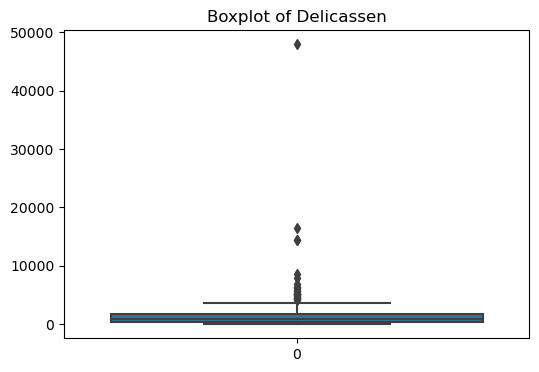

Number of outliers in Channel: 0
Number of outliers in Region: 0
Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27


In [98]:


# Draw boxplots for all features
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()
    
# Function to detect outliers
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = dataframe[(dataframe[column] < Q1 - 1.5*IQR) | (dataframe[column] > Q3 + 1.5*IQR)]
    return outliers

# Detect and print number of outliers for each feature
for column in data.columns:
    outliers = detect_outliers(data, column)
    print(f'Number of outliers in {column}: {len(outliers)}')

In [99]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)

# Handle outliers for each feature
for column in data.columns:
    handle_outliers(data, column)


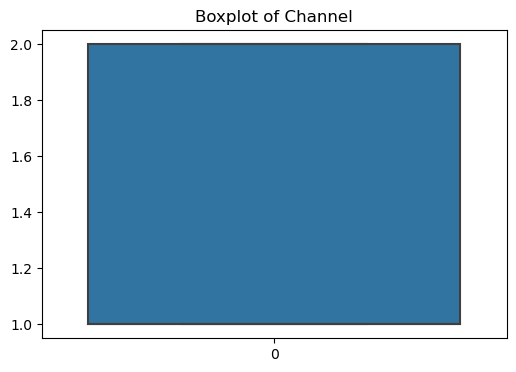

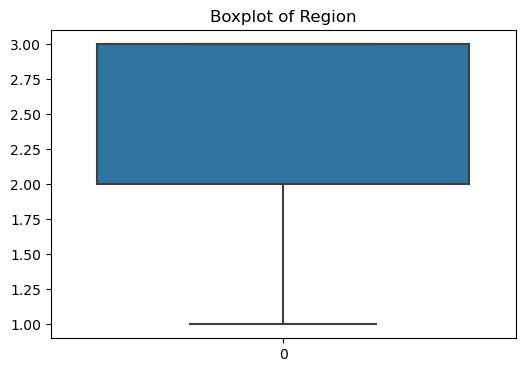

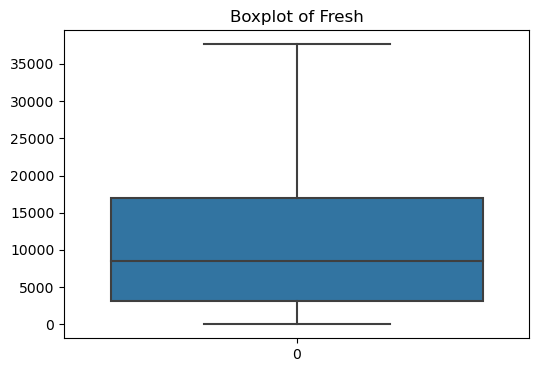

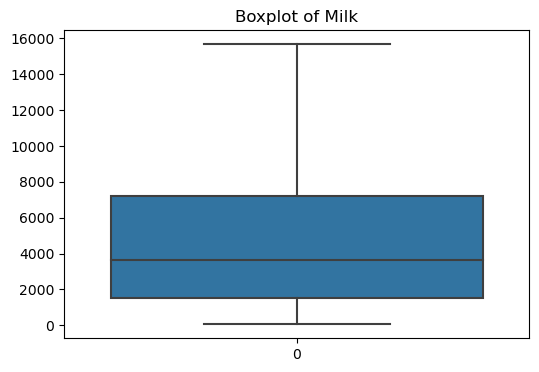

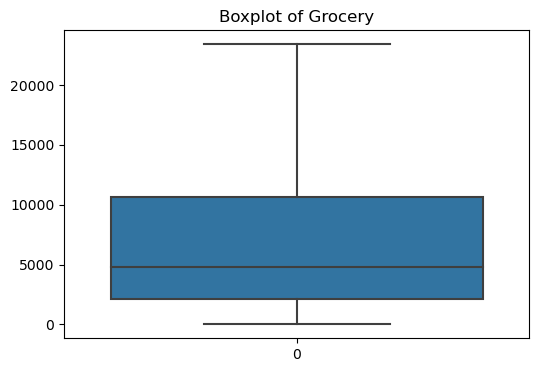

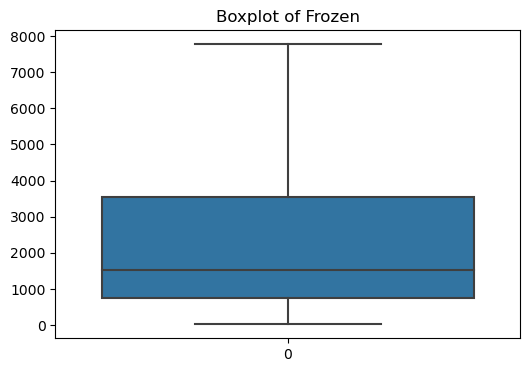

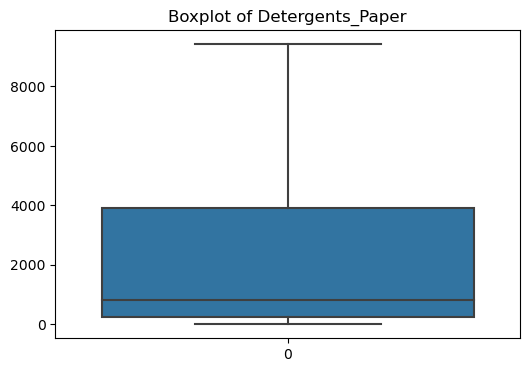

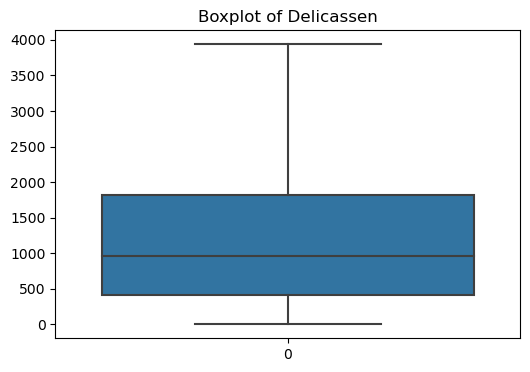

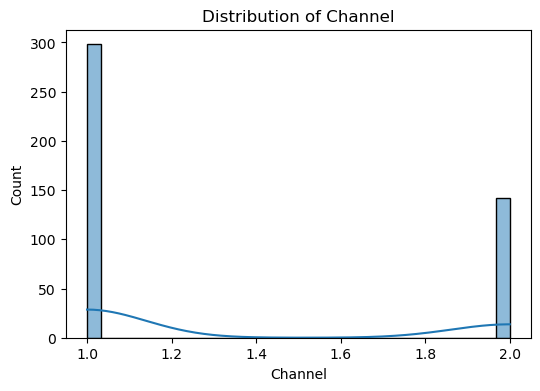

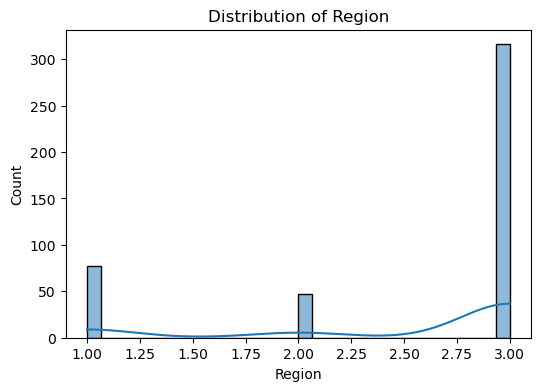

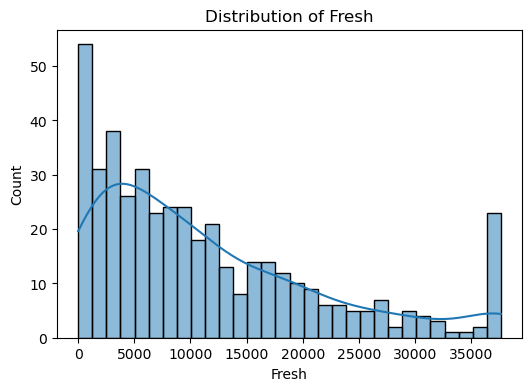

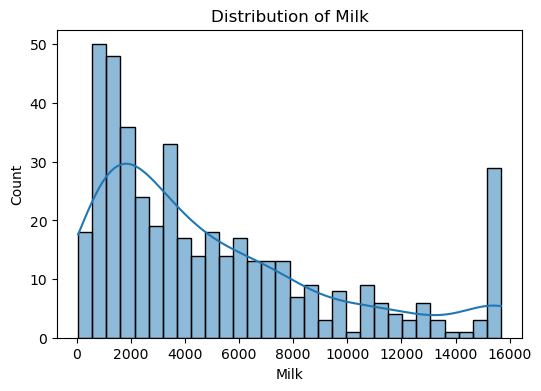

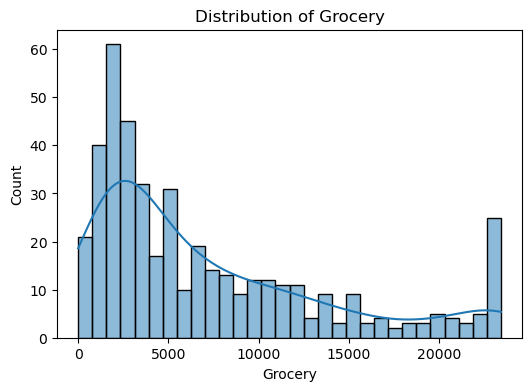

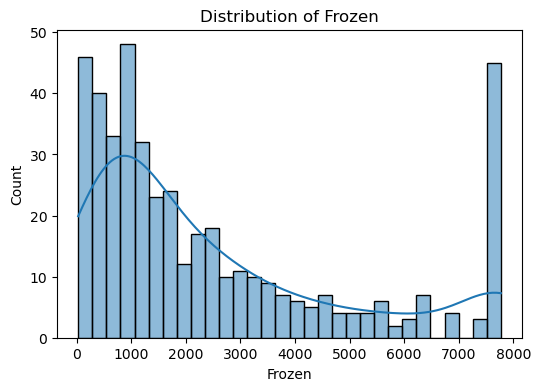

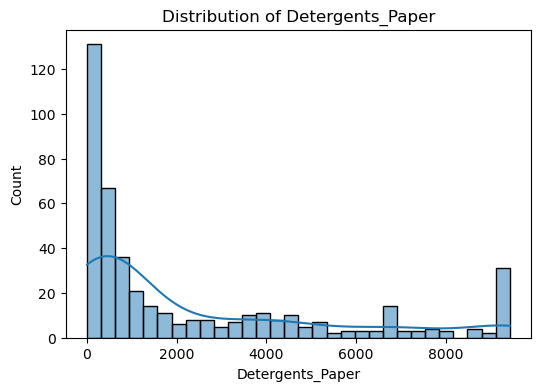

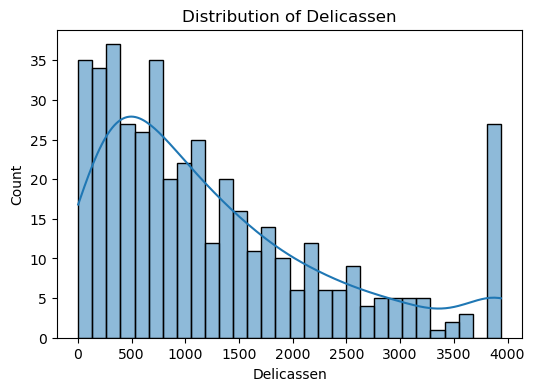

In [100]:
# Draw boxplots for all features
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Draw distribution plots for all features
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Descriptive Statistics:
          Channel      Region         Fresh          Milk      Grocery  \
count  440.000000  440.000000    440.000000    440.000000    440.00000   
mean     1.322727    2.543182  11357.568182   5048.592045   7236.37500   
std      0.468052    0.774272  10211.542235   4386.377073   6596.53308   
min      1.000000    1.000000      3.000000     55.000000      3.00000   
25%      1.000000    2.000000   3127.750000   1533.000000   2153.00000   
50%      1.000000    3.000000   8504.000000   3627.000000   4755.50000   
75%      2.000000    3.000000  16933.750000   7190.250000  10655.75000   
max      2.000000    3.000000  37642.750000  15676.125000  23409.87500   

            Frozen  Detergents_Paper   Delicassen  
count   440.000000        440.000000   440.000000  
mean   2507.085795       2392.616477  1266.715341  
std    2408.297738       2940.794090  1083.069792  
min      25.000000          3.000000     3.000000  
25%     742.250000        256.750000   408.250000

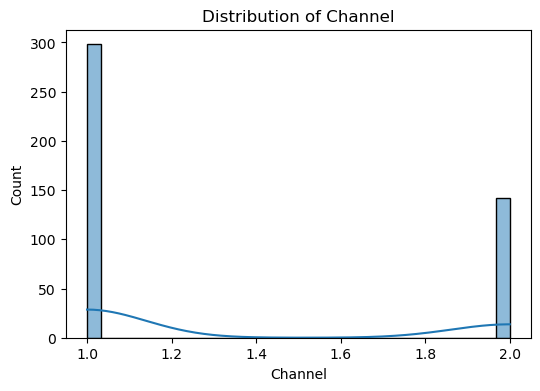

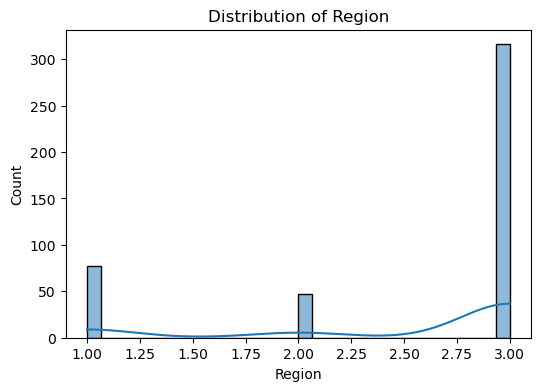

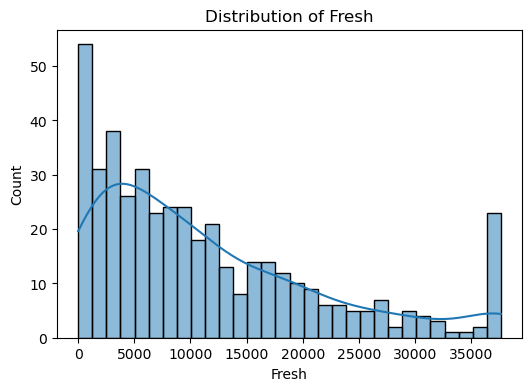

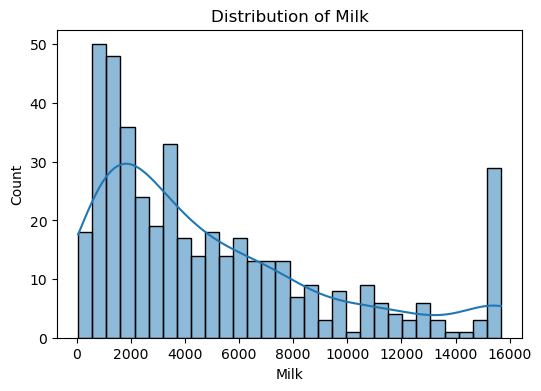

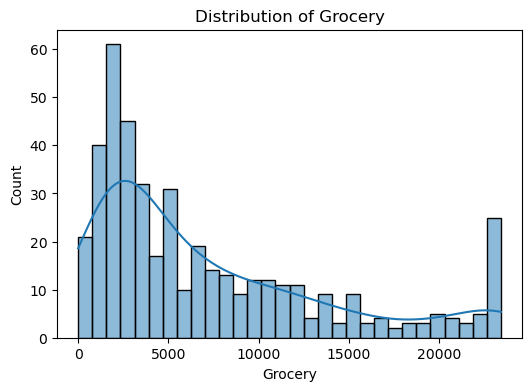

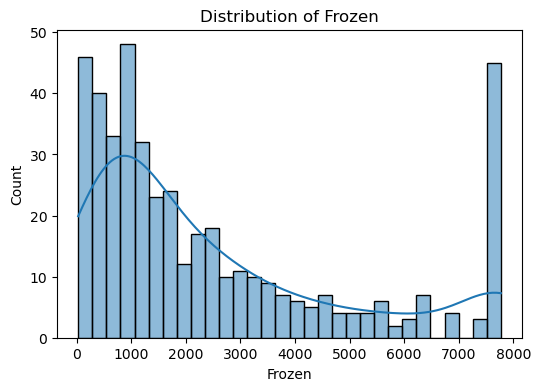

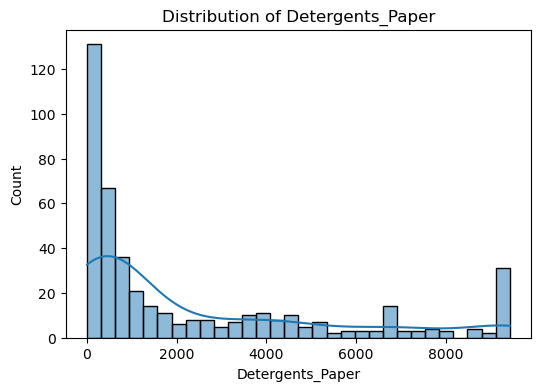

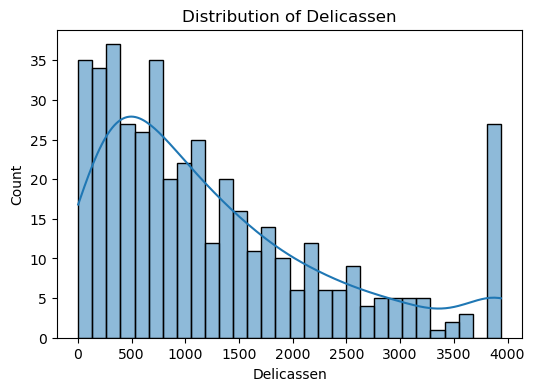

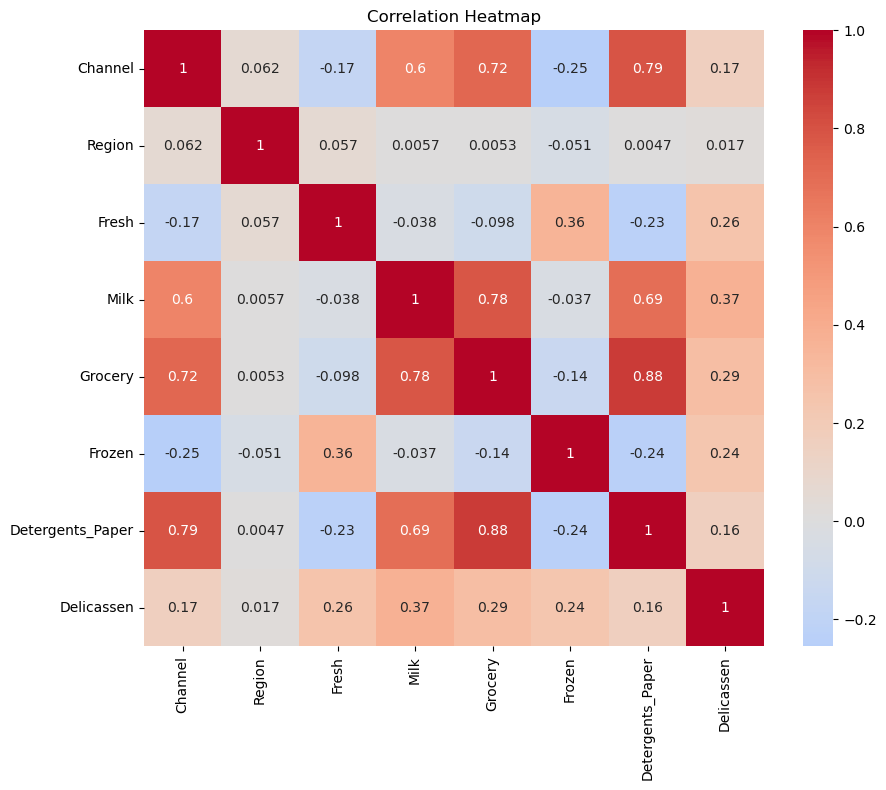

In [101]:
# Check descriptive statistics
print("Descriptive Statistics:")
print(data.describe())

# Check for duplicates
print("Number of duplicate rows: ", data.duplicated().sum())

# Distribution plots for each feature
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [102]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,1.448652,0.590668,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,1.448652,0.590668,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,-0.690297,0.590668,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.448652,0.590668,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,-0.690297,0.590668,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,1.448652,0.590668,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,-0.690297,0.590668,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

/Users/sanketdhameliya/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanketdhameliya/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanketdhameliya/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanketdhameliya/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

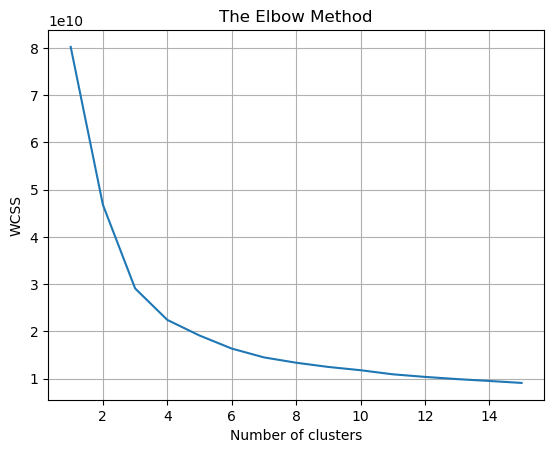

In [103]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
max_clusters = 15
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, max_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [104]:
from sklearn.cluster import KMeans

# Build the model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to your original dataframe
data['Cluster'] = cluster_labels

print(data.head())

   Channel  Region    Fresh    Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669.0  9656.0   7561.0   214.0            2674.0   
1        2       3   7057.0  9810.0   9568.0  1762.0            3293.0   
2        2       3   6353.0  8808.0   7684.0  2405.0            3516.0   
3        1       3  13265.0  1196.0   4221.0  6404.0             507.0   
4        2       3  22615.0  5410.0   7198.0  3915.0            1777.0   

   Delicassen  Cluster  
0     1338.00        2  
1     1776.00        3  
2     3938.25        0  
3     1788.00        2  
4     3938.25        2  


/Users/sanketdhameliya/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
# Add cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Check the size of each cluster
print("Cluster Sizes:\n", data['Cluster'].value_counts())

# Check the characteristics of each cluster
for i in range(4):
    print("\nCluster ", i)
    print(data[data['Cluster'] == i].describe())

Cluster Sizes:
 Cluster
0    176
2    112
3     94
1     58
Name: count, dtype: int64

Cluster  0
          Channel      Region         Fresh          Milk       Grocery  \
count  176.000000  176.000000    176.000000    176.000000    176.000000   
mean     1.136364    2.539773   4741.261364   3073.790483   3817.880682   
std      0.344153    0.777254   3072.006036   2492.137013   2790.348628   
min      1.000000    1.000000      3.000000     55.000000    137.000000   
25%      1.000000    2.000000   2116.000000   1109.000000   1739.250000   
50%      1.000000    3.000000   4659.500000   2268.000000   2765.500000   
75%      1.000000    3.000000   7369.250000   4394.250000   5494.500000   
max      2.000000    3.000000  10290.000000  15676.125000  12400.000000   

            Frozen  Detergents_Paper   Delicassen  Cluster  
count   176.000000        176.000000   176.000000    176.0  
mean   2192.274148       1176.454545   909.451705      0.0  
std    2210.017535       1473.393792   872.

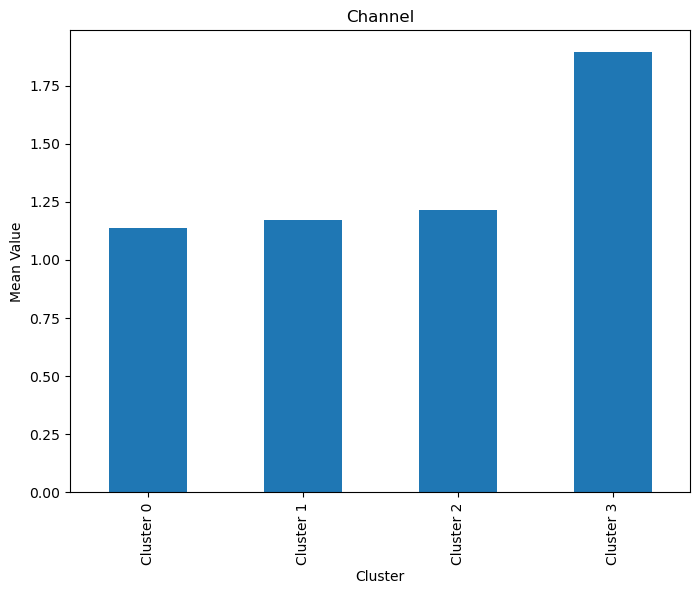

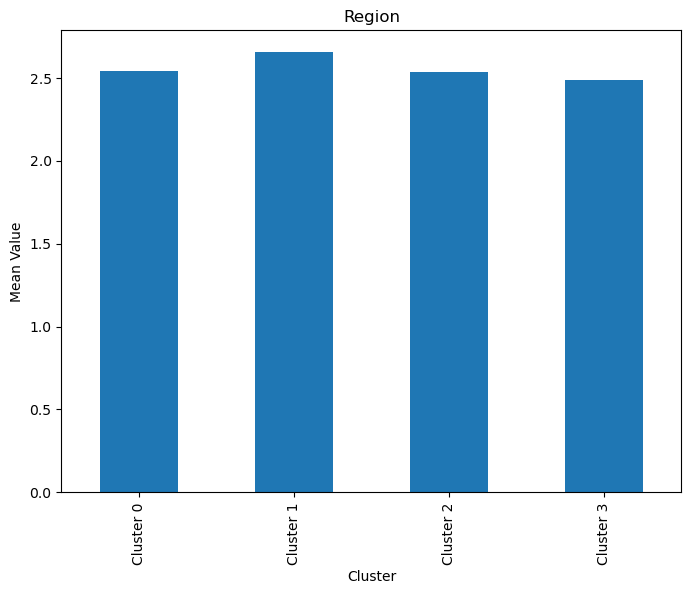

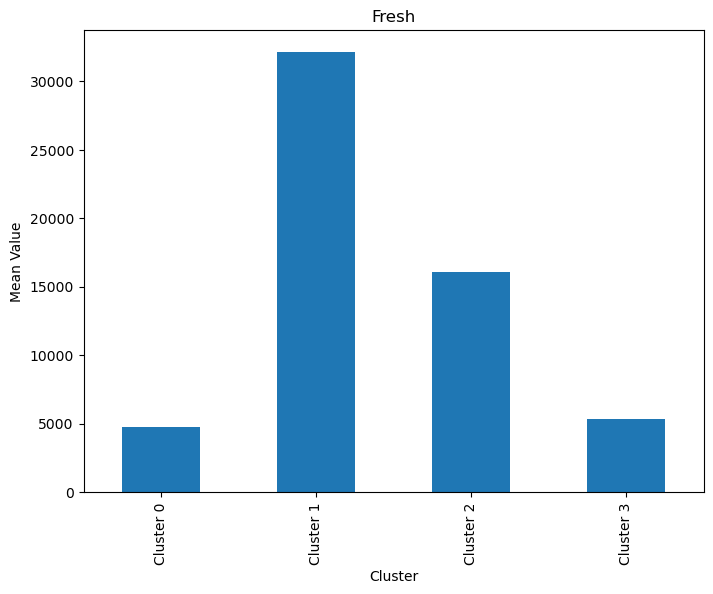

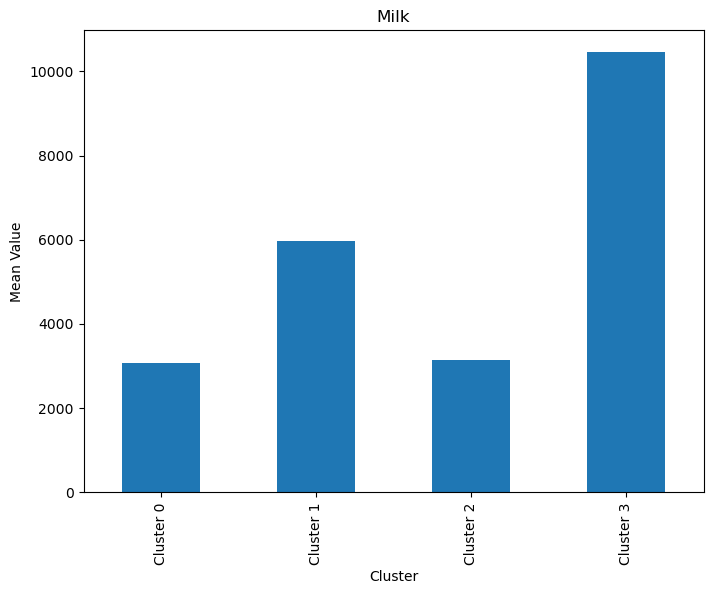

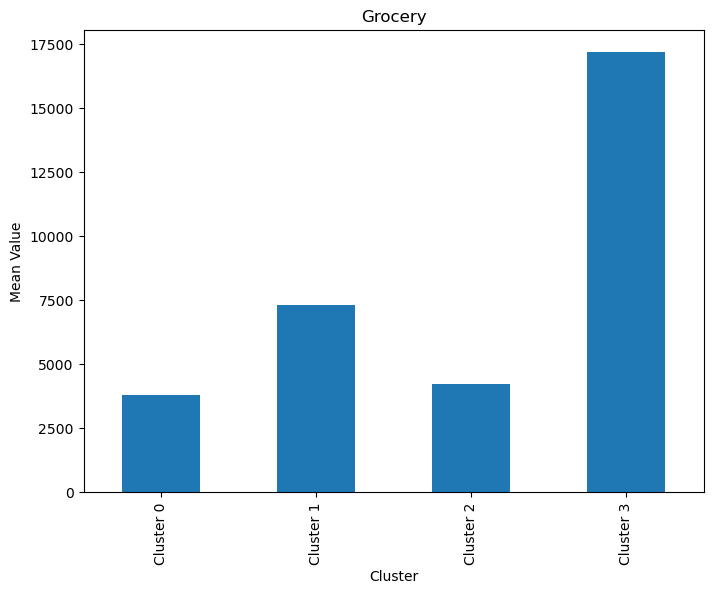

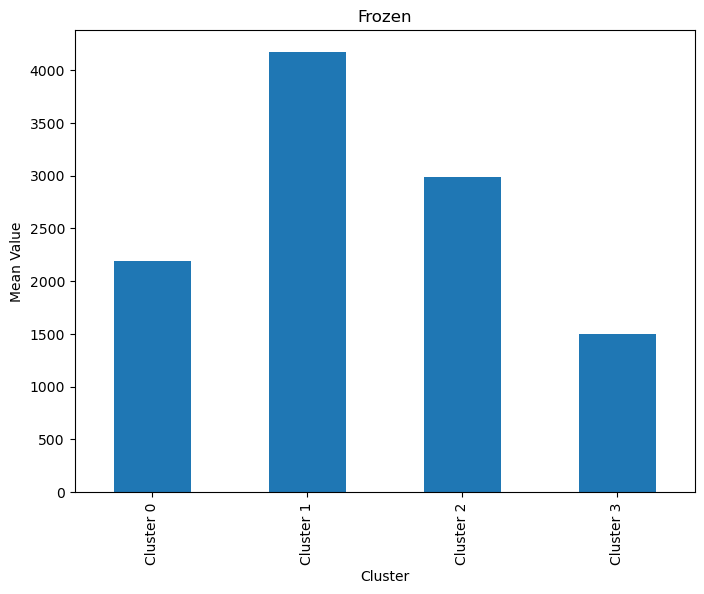

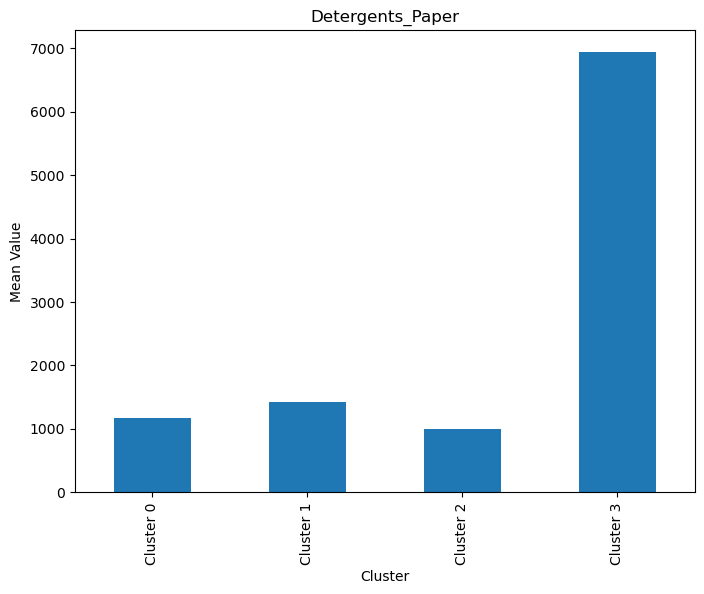

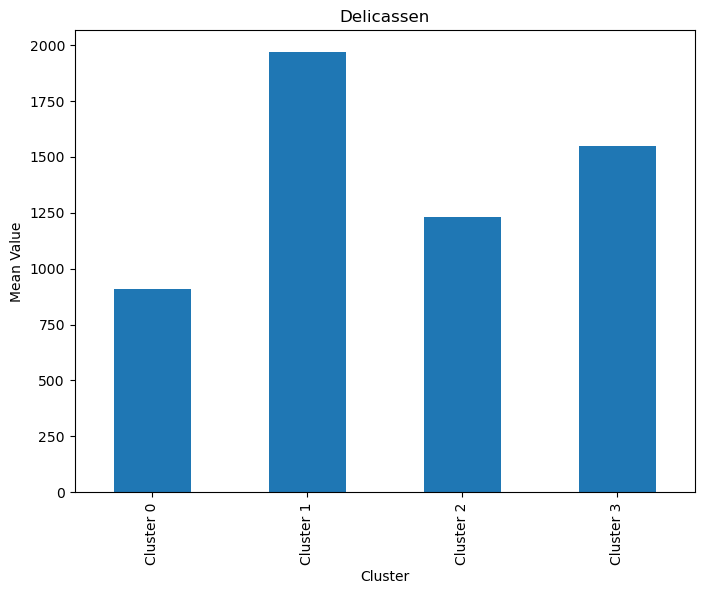

In [106]:
# Calculate the mean values for each feature per cluster
cluster_means = data.groupby('Cluster').mean()

# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()

# Create bar plot for each feature
for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(8,6))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.xticks(ticks=range(4), labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    plt.show()

In [107]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(data)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,KMeans_Clusters
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.00,2,2
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00,3,3
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25,0,0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00,2,2
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25,2,2
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.00,0,0
6,2,3,12126.0,3199.0,6975.0,480.0,3140.0,545.00,2,2
7,2,3,7579.0,4956.0,9426.0,1669.0,3321.0,2566.00,0,0
8,1,3,5963.0,3648.0,6192.0,425.0,1716.0,750.00,0,0
9,2,3,6006.0,11093.0,18881.0,1159.0,7425.0,2098.00,3,3


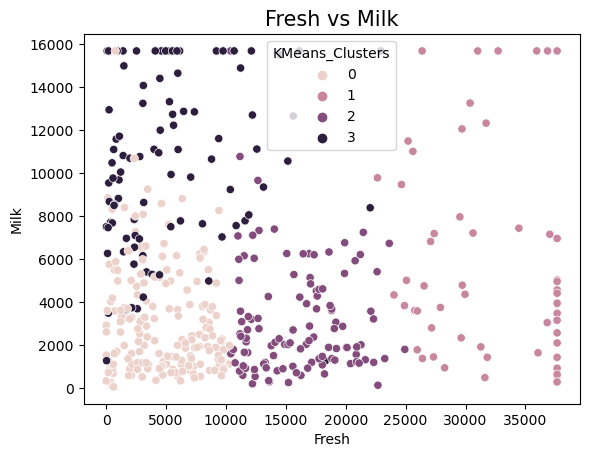

In [108]:
# Visualization of clusters Fresh vs Milk
sns.scatterplot(x='Fresh', y='Milk', hue='KMeans_Clusters', data=kmeans_df)
plt.title("Fresh vs Milk", fontsize=15)
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.show()


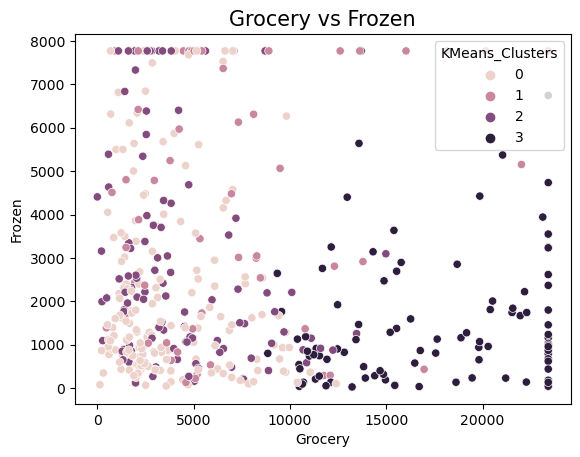

In [109]:
#visulization of clusters Grocery vs Frozen
sns.scatterplot(x = 'Grocery', y ='Frozen',hue='KMeans_Clusters',data=kmeans_df)
plt.title("Grocery vs Frozen", fontsize=15)
plt.xlabel("Grocery")
plt.ylabel("Frozen")
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

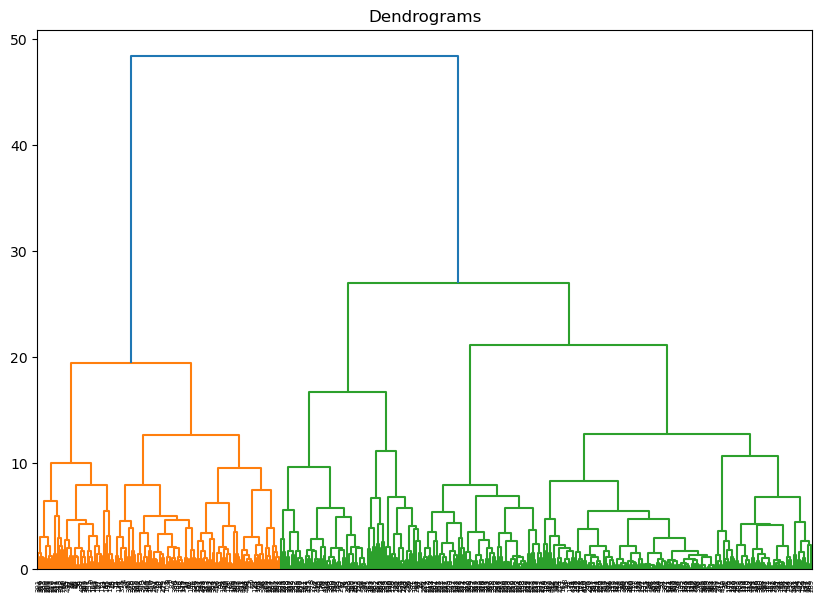

In [110]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

In [111]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled)

/Users/sanketdhameliya/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

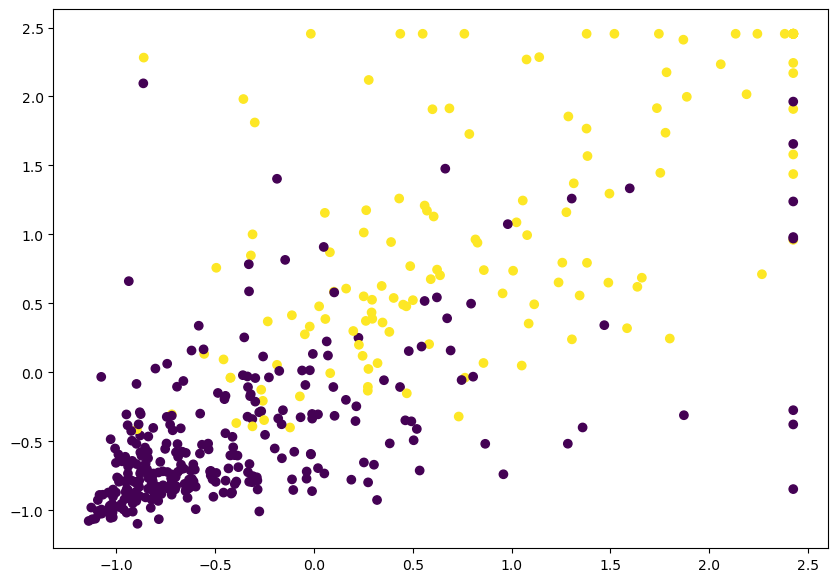

In [112]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['Milk'], df_scaled['Grocery'], c=cluster.labels_) 

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Variance ratio of each principal component: [0.58601648 0.34068282]


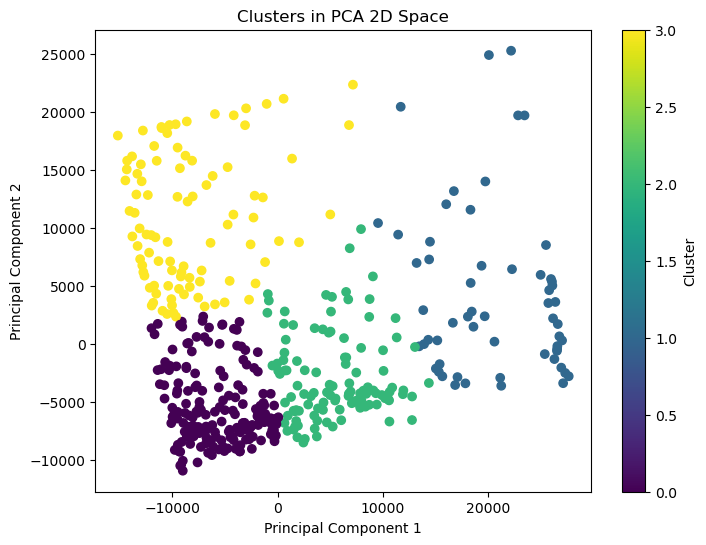

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data.drop('Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['PC 1', 'PC 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['Cluster'] = data['Cluster']

# Explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print('Variance ratio of each principal component:', explained_variance_ratio)
# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['PC 1'], PCA_components['PC 2'], c=PCA_components['Cluster'])
plt.title('Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [114]:
PCA_components

,PC 1,PC 2,Cluster
0,675.969627,2835.235730,2
1,-5037.834974,3614.893678,3
2,-5277.825585,1671.771887,0
3,3153.017616,-4480.670872,2
4,11212.456226,2257.181171,2
...,...,...,...
435,16758.033502,13210.365104,1
436,27344.655078,-2470.907129,1
437,-1044.046023,20728.294689,3
438,67.259994,-6286.301700,0


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Cluster Analysis: The K-means clustering algorithm identified four distinct clusters within the dataset. Each cluster represents a different group of customers with distinct purchasing behaviors. Cluster 0 (about 40% of the data) comprises customers with lower spending on most product categories, while Cluster 1 (about 26% of the data) consists of high-spenders on Fresh, Milk, and Grocery. Cluster 2 (about 25% of the data) represents customers with moderate spending across various product categories, and Cluster 3 (about 9% of the data) includes customers with high spending on Milk, Grocery, and Detergents_Paper.

Outlier Detection: Through the exploratory data analysis, we identified and handled outliers for each feature separately. Outliers were present in several product categories, such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen. The outlier handling process involved capping the extreme values, which helped in stabilizing the clusters and improving the quality of the clustering results.

Data Dimensionality Reduction: The Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset while preserving the most important information. The first two principal components explained around 93% of the total variance in the data. The visualization of the clustered data in the 2D PCA space revealed clear separation among the clusters, indicating that the chosen features captured relevant information for the clustering task.

Customer Segmentation: The clustering analysis provided valuable insights into customer segmentation, allowing the wholesale distributor to understand and target different customer groups effectively. By tailoring marketing strategies and product offerings to the specific needs of each cluster, the distributor can enhance customer satisfaction and optimize their supply chain management.